<a href="https://colab.research.google.com/github/GeetuSodhi15/Coursera_Capstone/blob/master/COURSE7_WEEK_4_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**What is a Model?**

A model is simply a system for mapping inputs to outputs.

For example, if we want to predict house prices, we could make a model that takes in the square footage of a house and outputs a price.

A model represents a theory about a problem: there is some connection between the square footage and the price and we make a model to learn that relationship. Models are useful because we can use them to predict the values of outputs for new data points given the inputs.

#**What is model development or model fitting?**

Model fitting is a measure of how well a machine learning model generalizes to similar data to that on which it was trained.

A model that is well-fitted produces more accurate outcomes.

**Model Development**

This is about building the model—choosing inputs, algorithms, and hyperparameters. Key points to teach:

**a) Understanding the Problem & Data**

Define the target variable and features.

Check data types, distributions, missing values.

Visualize relationships (scatter plots, correlation matrices).

**b) Choosing the Model**

Start simple (linear regression) and move to more complex models (polynomial, tree-based, etc.).

Explain bias vs variance tradeoff.

Demonstrate how underfitting occurs with overly simple models.

**Linear Regression**

Introduce as the simplest regression model.

Show its limitations when relationships are non-linear.

**Polynomial Regression**

Extend linear regression to capture non-linear relationships.

Explain polynomial degree and how it affects model flexibility.

#**Linear Regression**

Linear regression is a supervised learning algorithm used to model the relationship between a dependent variable (Y) and one or more independent variables (X) by fitting a straight line.It is a statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables
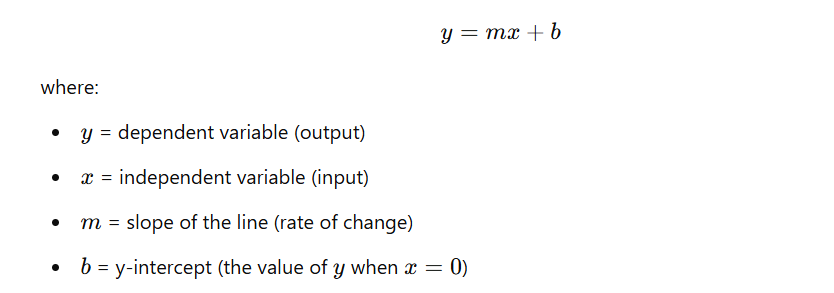





Slope (𝑚): It determines how much 𝑦 changes for every 1-unit increase in
x. If 𝑚 is positive, y increases as x increases (positive relationship). If
𝑚 is negative, y decreases as x increases (negative relationship).

Y-Intercept (b): This is the point where the line crosses the y-axis. It represents the value of y when x is zero.




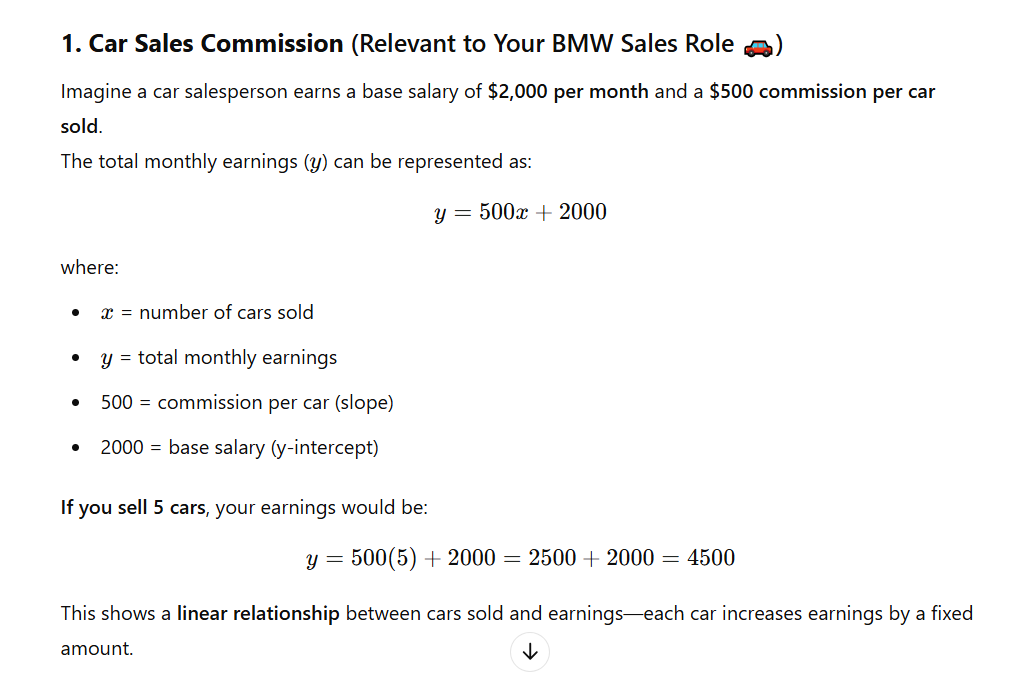


We create a LinearRegression model from **Scikit-Learn.**

We fit the model to our data, which finds the best-fit line (linear regression line) that minimizes the sum of squared errors.

We make predictions for new data points (X_new) using the trained model.

We visualize the data and the regression line using Matplotlib.

We print the model's coefficients, which represent the intercept (b0) and the coefficient (b1) of the linear equation (y = b0 + b1 * X).

This is a basic example of simple linear regression, where we have one independent variable. In practice, you'll often work with more complex datasets with multiple features, but the basic principles of linear regression remain the same.

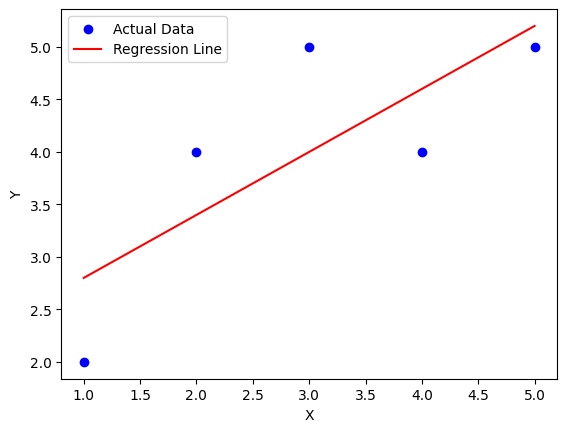

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Independent variable (must be 2D for sklearn)
Y = np.array([2, 4, 5, 4, 5])  # Dependent variable

# Create and Train Model
model = LinearRegression()
model.fit(X, Y)

# Predictions
Y_pred = model.predict(X)

# Plot
plt.scatter(X, Y, color='blue', label="Actual Data")
plt.plot(X, Y_pred, color='red', label="Regression Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


In [ ]:
r2_score = model.score(X, Y)

print(r2_score)

-0.49722222222222223


**Interpreting R² Score**

R² = 1 (Perfect Fit) → Model explains 100% of the variance in Y.

R² = 0 → Model does not explain any variance; it’s as good as taking the mean of Y.

R² < 0 → Model is worse than just predicting the mean (bad model).

**Matplotlib Reshape**
Reshape in Numpy
Reshaping is required when working with certain ML models that expect 2D arrays instead of 1D arrays.

In [ ]:
import numpy as np

X = np.array([1, 2, 3, 4, 5])
print("Original Shape:", X.shape)  # Output: (5,)

X_reshaped = X.reshape(-1, 1)
print("Reshaped Shape:", X_reshaped.shape)  # Output: (5, 1)




Original Shape: (5,)
Reshaped Shape: (5, 1)


In [ ]:
# .reshape(-1, 1): This part of the code reshapes the array. The -1 is a placeholder for the number of rows, and 1 specifies that you want one column.

# The -1 in the number of rows indicates that you want NumPy to automatically calculate the number of rows based on the original number of elements.
# In this case, since you have 3 elements in the array [6, 7, 8], NumPy will reshape it into a 3x1 matrix, meaning there will be 3 rows and 1 column.
# The -1 allows you to reshape the array without specifying the exact number of rows, making it more flexible.


# So, the purpose of reshape(-1, 1) is to transform the X_new array into a 2D array (specifically, a column vector) with one column.
# This reshaping is often required when you want to use this data with machine learning models that expect a certain input shape or when you
# want to make predictions using these data points with a model trained on data with a similar structure. In this case, the reshaped X_new can
# be used as input to the model.predict() method in the linear regression example, which expects the data to be in the form of a 2D array.

#Polynomial Regression
Polynomial regression is an extension of linear regression where we fit a curve instead of a straight line.

Equation of Polynomial Regression (Degree 2 Example):

Y=aX 2 +bX+c

A polynomial model is useful when a simple linear model is too basic to capture the complexity of the data. It helps in situations where there is a non-linear relationship between the independent and dependent variables.

**Why do we need polynomial regression?**

To overcome underfitting: A simple linear model may not capture the trend of the data properly, leading to high bias (underfitting). A polynomial model allows for more flexibility.

To avoid overfitting: While a high-degree polynomial can fit the training data very well, it may capture noise rather than the actual trend, leading to overfitting. The key is to find the right degree of the polynomial to balance bias and variance.

A salesperson's salary often includes:

Base Salary (fixed amount)

Commission (based on car sales)

**If the dealership offers discounts, car sales might increase up to a point, but excessive discounts can reduce commissions.**

Expected Relationship (Non-Linear)
At low discounts (0-5%), few buyers take advantage, so sales and commission are low.

At moderate discounts (10-20%), sales increase, and the salesperson earns more commission.

At high discounts (30%+), the dealership might lose profit, reduce commissions, or even cap bonuses.

Thus, a polynomial regression model (instead of a linear one) better captures this real-world trend.

-------

A linear model would assume salary keeps increasing with more discounts—not realistic.

A polynomial model shows that after a certain discount level, salary starts decreasing due to lower commissions or caps.

Helps salespeople and managers find the optimal discount range for maximum earnings.

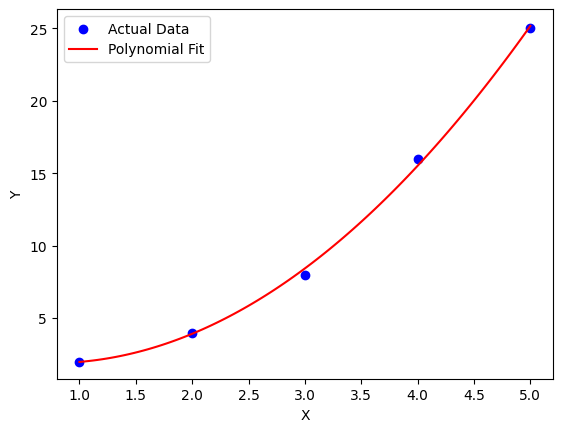

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generate Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2, 4, 8, 16, 25])  # Quadratic pattern

# Create Polynomial Regression Model (Degree 2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X, Y)

# Predictions
X_range = np.linspace(1, 5, 100).reshape(-1, 1)
Y_pred = poly_model.predict(X_range)

# Plot
plt.scatter(X, Y, color='blue', label="Actual Data")
plt.plot(X_range, Y_pred, color='red', label="Polynomial Fit")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


In [ ]:
r2_score = poly_model.score(X, Y)

print(r2_score)

0.9987301587301587


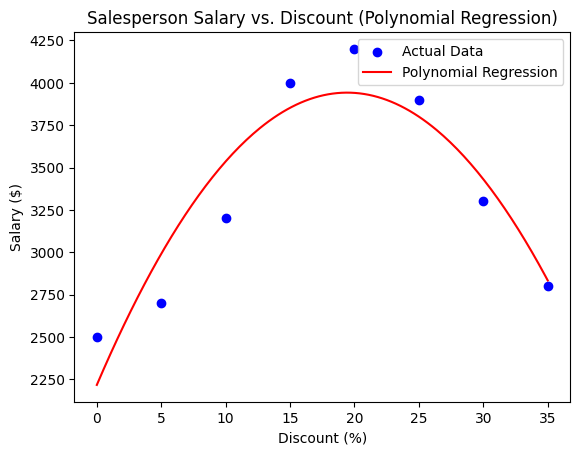

In [ ]:
#Example for Car sales
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Sample data: discount (%) vs salary ($)
discount = np.array([0, 5, 10, 15, 20, 25, 30, 35]).reshape(-1, 1)
salary = np.array([2500, 2700, 3200, 4000, 4200, 3900, 3300, 2800])  # made-up data

# Create polynomial features (degree 2 works well here)
poly = PolynomialFeatures(degree=2)
discount_poly = poly.fit_transform(discount)

# Fit polynomial regression
model = LinearRegression()
model.fit(discount_poly, salary)

# Predict salaries for smooth curve
discount_range = np.linspace(0, 35, 200).reshape(-1, 1)
salary_pred = model.predict(poly.transform(discount_range))

# Plot
plt.scatter(discount, salary, color="blue", label="Actual Data")
plt.plot(discount_range, salary_pred, color="red", label="Polynomial Regression")
plt.xlabel("Discount (%)")
plt.ylabel("Salary ($)")
plt.title("Salesperson Salary vs. Discount (Polynomial Regression)")
plt.legend()
plt.show()


#Overfitting vs Underfitting

Overfitting

Model learns the training data too well, including noise.

High accuracy on training data but poor performance on new data.

Underfitting

Model is too simple and cannot capture patterns in data.

Low accuracy on both training and test data.

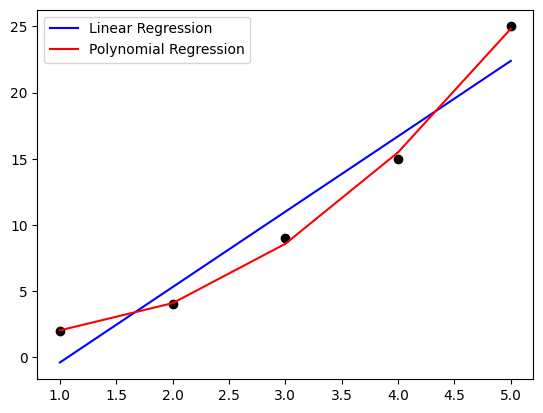

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 4, 9, 15, 25])

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)

# Polynomial Regression (degree 2)
poly_reg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_reg.fit(X, y)
y_pred_poly = poly_reg.predict(X)

# Plot
plt.scatter(X, y, color='black')
plt.plot(X, y_pred_lin, label="Linear Regression", color='blue')
plt.plot(X, y_pred_poly, label="Polynomial Regression", color='red')
plt.legend()
plt.show()


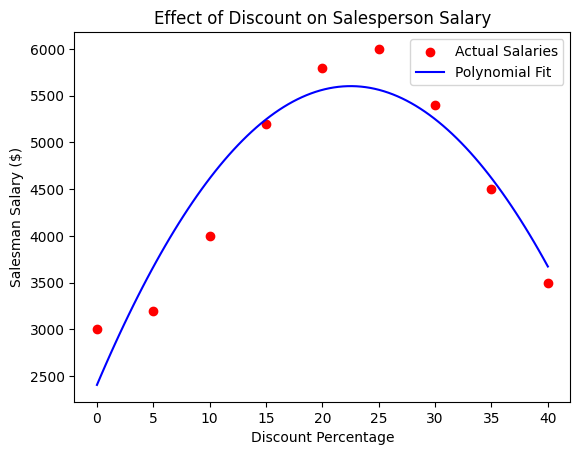

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Simulated data: Discount % vs Salesperson's Salary ($)
discounts = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40]).reshape(-1, 1)
salary = np.array([3000, 3200, 4000, 5200, 5800, 6000, 5400, 4500, 3500])  # Drop in salary after too much discount

# Transform features to polynomial (degree=2)
poly = PolynomialFeatures(degree=2)
discounts_poly = poly.fit_transform(discounts)

# Train polynomial regression model
model = LinearRegression()
model.fit(discounts_poly, salary)

# Predict values
discount_range = np.linspace(0, 40, 100).reshape(-1, 1)
discount_range_poly = poly.transform(discount_range)
salary_pred = model.predict(discount_range_poly)

# Plot the results
plt.scatter(discounts, salary, color='red', label='Actual Salaries')
plt.plot(discount_range, salary_pred, color='blue', label='Polynomial Fit')
plt.xlabel('Discount Percentage')
plt.ylabel('Salesman Salary ($)')
plt.title('Effect of Discount on Salesperson Salary')
plt.legend()
plt.show()


In [ ]:
r2_score = model.score(discounts_poly,salary)

print(r2_score)

0.8785549630424977


**********************************************************************************************

**Another Example for Some other day**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

df=pd.read_csv("Insta.csv")
df.head()


,Impressions,From Home,From Hashtags,From Explore,Saves,Saves2,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,70,140,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,96,192,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,124,248,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,46,92,10,7,213,23,8,Here’s how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,16,32,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


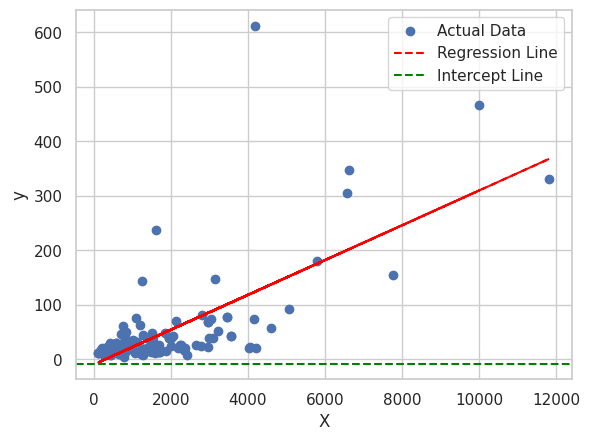

Intercept (b0): -9.686958218440054
Coefficient (b1): [0.03195147]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

df=pd.read_csv("Insta.csv")
df.head()

# # Generate some sample data
# X = np.array([18, 23,45,56,67,23, 33, 44, 55]).reshape(-1, 1)  # Independent variable (feature)
# y = np.array([2, 4,7, 8, 4,5,6,7,8])  # Dependent variable (target)

X=df['From Hashtags'].values.reshape(-1,1)
y=df['Profile Visits']

# # Create a linear regression model
model = LinearRegression()

# # Fit the model to the data
model.fit(X, y)

yhat=model.predict(X)
# # Make predictions


# # Visualize the data and the regression line
plt.scatter(X, y, label='Actual Data')
plt.plot(X, yhat, color='red', linestyle='--', label='Regression Line')
plt.axhline(y=model.intercept_, color='green', linestyle='--', label='Intercept Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# # Print the model's coefficients
print("Intercept (b0):", model.intercept_)
print("Coefficient (b1):", model.coef_)

In [ ]:
r2_score = model.score(X, y)

print(r2_score)

0.47795777745579326


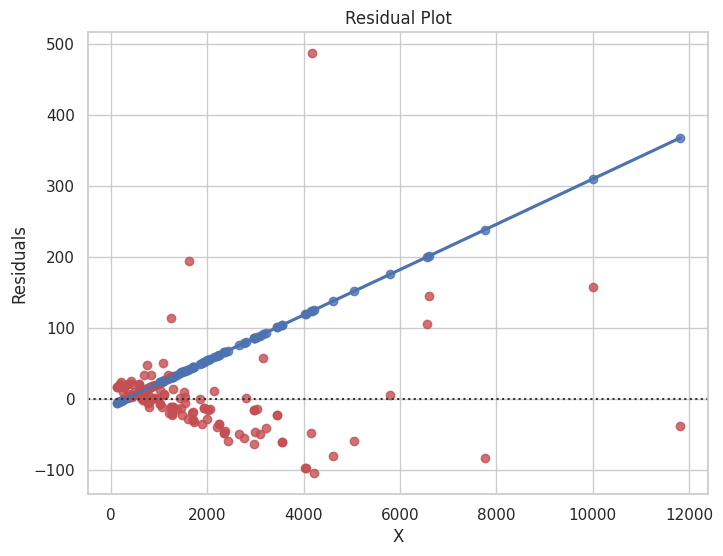

In [ ]:
import numpy as np
import seaborn as sns

# Calculate the residuals

residuals = y - yhat

# Create a residual plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
# Create a regression plot and residual plot
sns.regplot(x=X, y=yhat, ci=None, color='b', label='Regression Line')
# plt.show()
sns.residplot(x=X ,y=residuals, color='r', label='Residuals')

plt.xlabel("X")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# We fit the polynomial regression model to the data as shown in the previous example.
# We calculate the residuals by subtracting the predicted values (y_pred) from the actual values (y).
# We use Seaborn's residplot function to create the residual plot. The lowess=True argument adds a lowess smoother line to the plot for better visualization.
# This code will produce a residual plot that helps you assess the goodness of fit for your regression model. The residuals should be randomly
# scattered around zero if the model assumptions are met.








In linear regression, the coefficient of determination, often denoted as R-squared (R²), is a statistical measure that quantifies the goodness of fit of the regression model to the observed data. It is a commonly used metric in linear regression for the following reasons:

Model Fit Assessment: R-squared is used to assess how well the linear regression model fits the observed data. It provides a measure of the proportion of the variance in the dependent variable (y) that is explained by the independent variable(s) (X) in the model. In other words, it tells you how well the model captures the variation in the data.

Comparison of Models: R-squared allows you to compare different regression models. When comparing models with different independent variables, R-squared helps you determine which model provides a better fit to the data. A higher R-squared value generally indicates a better fit.

Model Simplicity: R-squared helps in evaluating whether the addition of independent variables significantly improves the model's performance. If the increase in R-squared is minimal when adding more variables, it suggests that the additional complexity may not be justified.

The R-squared value typically ranges from 0 to 1, where:

An R-squared of 0 indicates that the model does not explain any of the variability in the dependent variable.
An R-squared of 1 indicates that the model explains all of the variability in the dependent variable.
An R-squared value between 0 and 1 indicates the proportion of the variability in the dependent variable that is explained by the model. For example, an R-squared of 0.80 means that 80% of the variance in the dependent variable is explained by the independent variable(s) in the model.

It's important to note that while R-squared is a valuable metric, it has limitations. It does not provide information about the correctness of the model's assumptions or the significance of individual predictors. Therefore, it should be used in conjunction with other statistical tests and domain knowledge to fully assess a regression model

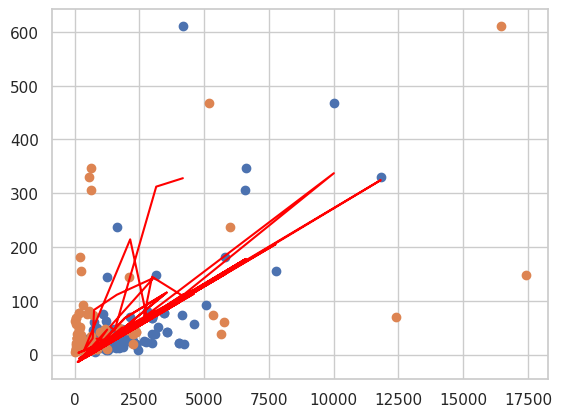

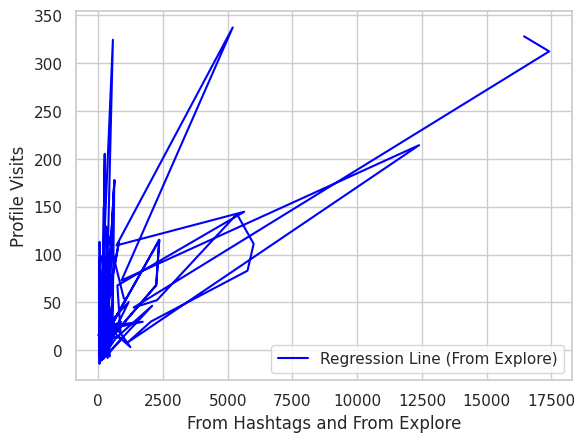

Intercept (b0): -17.708439618556902
Coefficient (b1): [0.02829648 0.01383946]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

df=pd.read_csv("Insta.csv")
df.head()

# # Generate some sample data
# X = np.array([18, 23,45,56,67,23, 33, 44, 55]).reshape(-1, 1)  # Independent variable (feature)
# y = np.array([2, 4,7, 8, 4,5,6,7,8])  # Dependent variable (target)

X=df[['From Hashtags', 'From Explore']]
y=df['Profile Visits']

# # Create a linear regression model
model = LinearRegression()

# # Fit the model to the data
model.fit(X, y)

yhat=model.predict(X)
# # Make predictions

x=df['From Hashtags'].values.reshape(-1,1)
# # # Visualize the data and the regression line
# Create a scatter plot of the actual values
plt.scatter(x, y, label='From Hashtags')
plt.scatter(df['From Explore'], y, label='From Explore')

# Create a regression line plot for the predictions
plt.plot(df['From Hashtags'], yhat, color='red', label='Regression Line (From Hashtags)')
plt.show()
plt.plot(df['From Explore'], yhat, color='blue', label='Regression Line (From Explore)')

# Add labels and legend
plt.xlabel('From Hashtags and From Explore')
plt.ylabel('Profile Visits')
plt.legend()
plt.show()

# # Print the model's coefficients
print("Intercept (b0):", model.intercept_)
print("Coefficient (b1):", model.coef_)

Multiple linear regression is a more versatile technique that can model complex relationships in real-world scenarios where multiple factors influence the outcome. Both techniques are widely used in various fields, including economics, social sciences, and machine learning, to analyze and predict relationships between variables.

In [ ]:
r2_score = model.score(X, y)

print(r2_score)

0.6441304099153002


1️⃣Slope (b₁)

Shows the change in the dependent variable (y) for a one-unit increase in the independent variable (X).

Positive slope → y increases as X increases.

Negative slope → y decreases as X increases.

2️⃣ Intercept (b₀)

The predicted value of y when X = 0.

Represents the baseline or starting point of the regression line.

Can be positive or negative depending on the problem context.

3️⃣ R² (Coefficient of Determination)

Measures how well the model explains the variability in y.

Ranges from 0 to 1:

0 → model explains none of the variability

1 → model explains all the variability

Higher R² → better fit (but check for overfitting if R² is too close to 1 on training data).

4️⃣ Residuals

The difference between actual y values and predicted y values.

Small, randomly distributed residuals → good model fit.

| **Intercept (b₀)** | **Slope (b₁)** | **Relationship**     | **Interpretation**                                                           | **Example**                                                                            |
| ------------------ | -------------- | -------------------- | ---------------------------------------------------------------------------- | -------------------------------------------------------------------------------------- |
| Positive           | Positive       | Positive correlation | When X = 0, y starts positive; as X increases, y increases further           | House prices: base price positive; larger square footage → higher price                |
| Positive           | Negative       | Negative correlation | When X = 0, y starts positive; as X increases, y decreases                   | Task completion: baseline time positive; more work done → time decreases               |
| Negative           | Positive       | Positive correlation | When X = 0, y starts negative; as X increases, y increases toward/above zero | Profit from a new product: initial loss; sales increase → profit grows                 |
| Negative           | Negative       | Negative correlation | When X = 0, y starts negative; as X increases, y decreases further           | Debt growth: initial negative balance; higher interest rate → debt grows more negative |


**POLYNOMIAL REGRESSION**


polynomial regression is a type of regression analysis used to model relationships between variables when the relationship isn't a straight line (as in simple linear regression) but instead follows a curved or nonlinear pattern.

Imagine you have data points that don't seem to follow a straight line on a scatterplot. In simple linear regression, you'd try to fit a straight line to those points, but it might not capture the underlying relationship accurately. Polynomial regression allows you to use a curved line (a polynomial function) to better match the data.

Here's why we need polynomial regression:

Better Data Modeling: In many real-world scenarios, the relationship between variables isn't linear. It might follow a curve, like a parabola (quadratic), a cubic curve, or any other polynomial shape. Using polynomial regression, we can model these more complex relationships.

Improved Accuracy: If you try to fit a linear model to data with a nonlinear relationship, the model won't provide an accurate representation of the data. Polynomial regression can capture these nuances and offer more accurate predictions.

Flexibility: Polynomial regression allows you to adjust the degree of the polynomial (e.g., linear, quadratic, cubic, etc.) to best fit your data. You can choose a degree that balances model complexity and accuracy.

Visual Representation: Polynomial regression provides a visually intuitive way to capture the shape of data relationships. This can be particularly useful for explaining and understanding complex data patterns.

To sum it up, polynomial regression is a valuable tool when you need to capture and model nonlinear relationships in your data, providing a more accurate representation of the real-world phenomena you're trying to understand and predict.

**y = a + b1x + b2x^2 +....+ bnx^n**

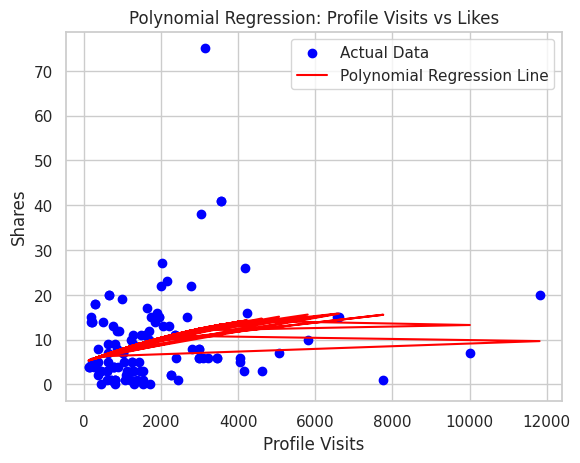

In [ ]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

df=pd.read_csv("Insta.csv")
df.head()


# Select 'Profile Visits' as the independent variable (X) and 'Likes' as the dependent variable (y)
X = df['From Hashtags'].values.reshape(-1,1)
y = df['Shares']

# Create polynomial features (in this case, quadratic regression)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Create and fit a polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Make predictions
y_pred = model.predict(X_poly)

# Visualize the data and the polynomial regression line
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Polynomial Regression Line')
plt.title('Polynomial Regression: Profile Visits vs Likes')
plt.xlabel('Profile Visits')
plt.ylabel('Shares')
plt.legend()
plt.show()

# In this example:

# We use a simplified hypothetical Instagram dataset with 'Profile Visits' and 'Likes' columns.

# We select 'Profile Visits' as the independent variable ('X') and 'Likes' as the dependent variable ('y').

# We create polynomial features using PolynomialFeatures to perform quadratic regression (degree=2).

# We fit the polynomial regression model, make predictions, and visualize the results.

# This code demonstrates how you can apply polynomial regression to analyze
# the relationship between the number of profile visits and the number of likes on Instagram posts.
#  You can adjust the polynomial degree or explore other Instagram data columns if your analysis requires it.







Pipelines

Predicted Y values: [300. 320.]


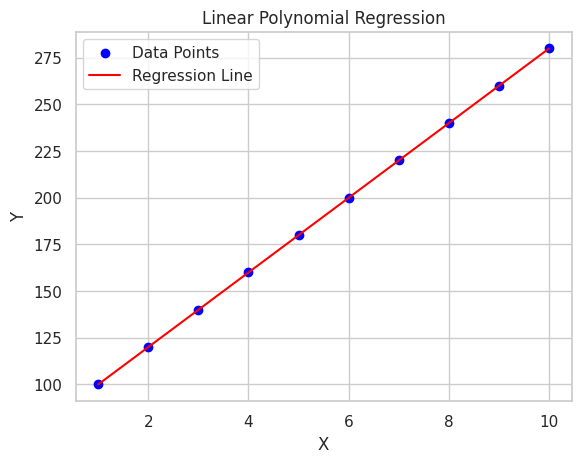

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Sample data
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # Replace with your x-values
y = np.array([100, 120, 140, 160, 180, 200, 220, 240, 260, 280])  # Replace with your y-values

# Create a pipeline with PolynomialFeatures and LinearRegression
degree = 1  # Degree of the polynomial (1 for linear)
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model to the data
model.fit(X[:, np.newaxis], y)

# Predict the values
X_new = np.array([11, 12])  # New x-values for prediction
y_pred = model.predict(X_new[:, np.newaxis])

print("Predicted Y values:", y_pred)

# Plot the data points
plt.scatter(X, y, label="Data Points", color="blue")

# Plot the regression line
X_range = np.linspace(X.min(), X.max(), 100)  # Create a range of X values
y_range = model.predict(X_range[:, np.newaxis])
plt.plot(X_range, y_range, label="Regression Line", color="red")

# Add labels and legend
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

# Show the plot
plt.title("Linear Polynomial Regression")
plt.show()
# In this code:

# We first fit the model as described in the previous code.
# We then create a range of X values using linspace to create a smooth line for the regression line.
# We use scatter to plot the data points in blue.
# We use plot to visualize the regression line in red.
# We add labels and a legend to the plot.
# Finally, we display the plot using show().
# You can adjust the sample data and degree as needed, and this code will plot the linear polynomial regression line along with your data points.







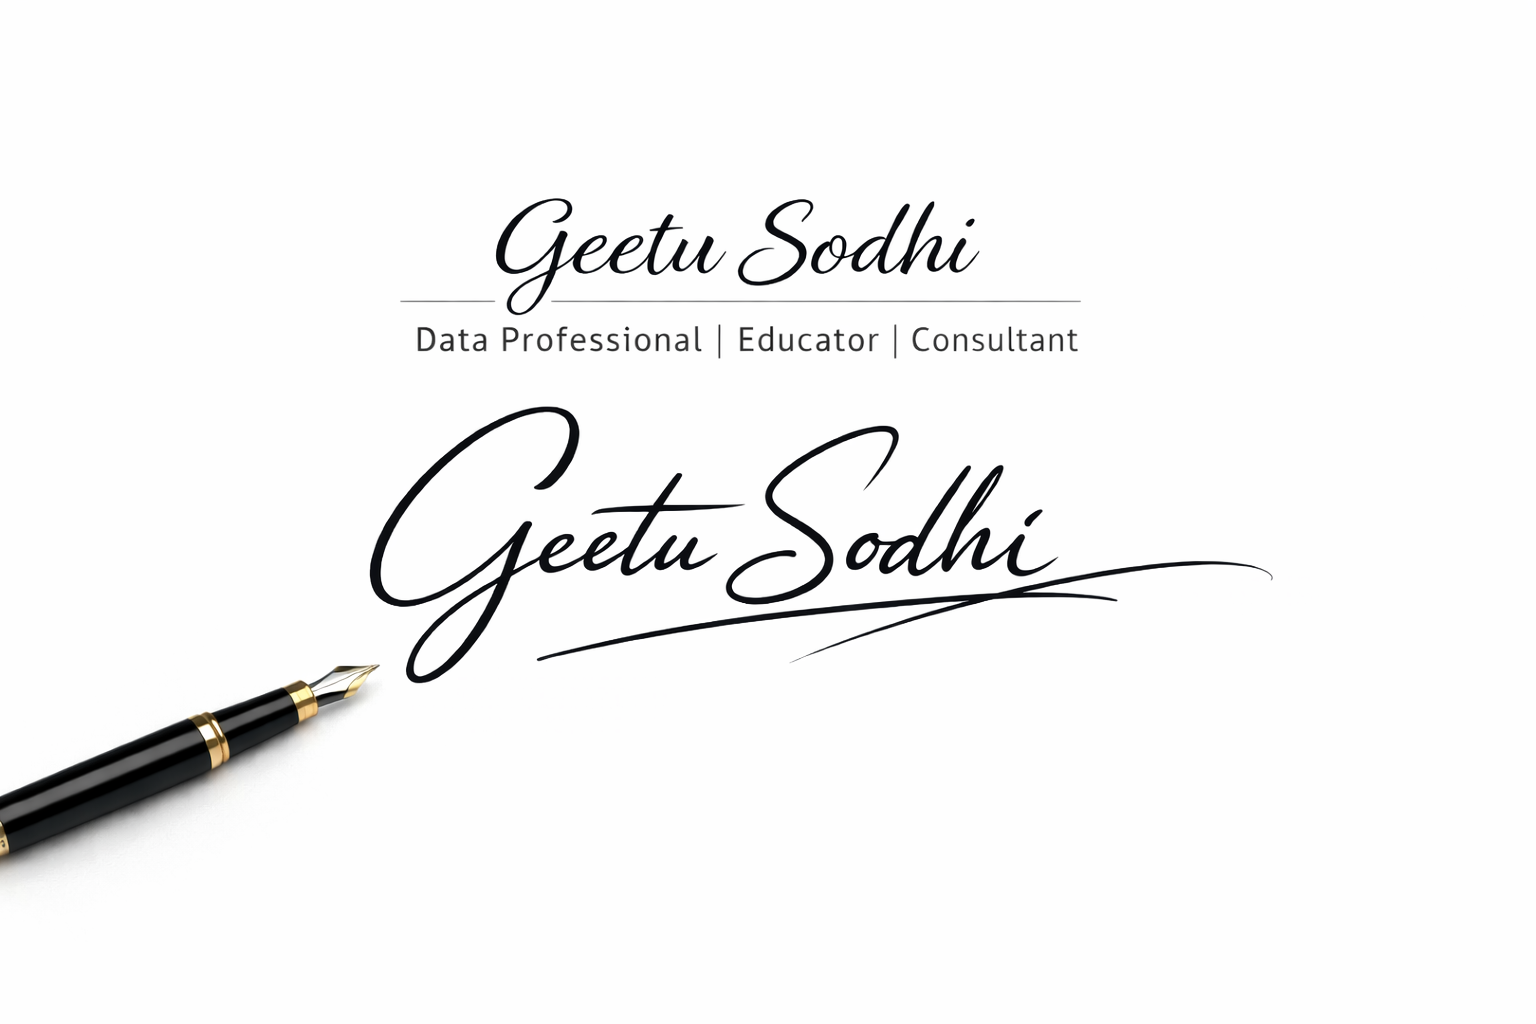